In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from scipy.stats import entropy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Input, Dropout, LSTM
from tensorflow.keras.layers import Bidirectional,BatchNormalization
from tensorflow.keras.layers import PReLU,ReLU,Reshape
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import callbacks,layers
import random
from sklearn.utils import resample
from tensorflow.keras.utils import plot_model

In [4]:
EEG = pd.read_csv("EEG.csv", low_memory=False)

In [5]:
EEG

,Unnamed: 0,obs,time,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation,Derived,totPwr,status
0,0.0,286.0,302.0,33448,7054,1692,8833,9796,17692,8025,6926,27,44,0,93466,0
1,0.0,286.0,302.0,33448,7054,1692,8833,9796,17692,8025,6926,27,44,0,93466,0
2,1.0,287.0,303.0,608545,25029,20343,25430,17084,8580,4385,2455,38,56,0,711851,0
3,1.0,287.0,303.0,608545,25029,20343,25430,17084,8580,4385,2455,38,56,0,711851,0
4,2.0,288.0,304.0,4719,3386,4546,60240,9943,23837,8403,2252,50,66,0,117326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,NaN,NaN,NaN,211355,14593,4594,3953,1269,2681,2298,451,35,47,NA,241194,1
13496,NaN,NaN,NaN,1769201,676309,144288,170323,81213,128252,142854,30079,43,51,NA,3142519,1
13497,NaN,NaN,NaN,1769201,676309,144288,170323,81213,128252,142854,30079,43,51,NA,3142519,1
13498,NaN,NaN,NaN,1769201,676309,144288,170323,81213,128252,142854,30079,43,51,NA,3142519,1


In [6]:
to_drop = ['Unnamed: 0', 'obs', ' time', ' Attention', ' Meditation', ' Derived']
EEG.drop(to_drop, axis=1, inplace=True)

In [128]:
eegler = [' Delta', ' Theta', ' Alpha1', ' Alpha2', ' Beta1', ' Beta2', ' Gamma1', ' Gamma2', ' totPwr']

<AxesSubplot:>

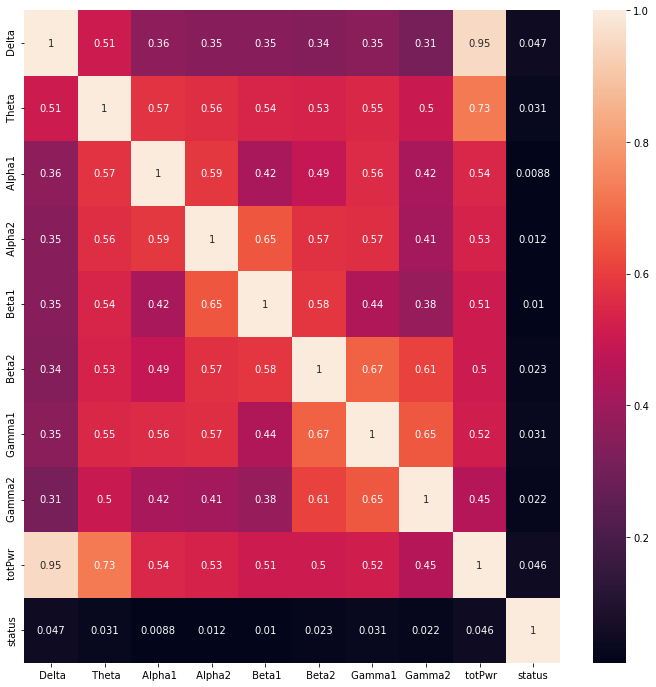

In [129]:
plt.figure(figsize = (12,12))
cor_matrix = EEG.corr()
sns.heatmap(cor_matrix,annot=True)

In [130]:
from sklearn.feature_selection import mutual_info_classif

In [137]:
y=pd.get_dummies(EEG['status'])
mi_score=mutual_info_classif(EEG.drop('status',axis=1),EEG['status'])
mi_score=pd.Series(mi_score,index=EEG.drop('status',axis=1).columns)
mi_score=(mi_score*100).sort_values(ascending=False)
mi_score

 totPwr    43.478509
 Alpha2    42.766762
 Alpha1    42.171906
 Delta     41.702102
 Theta     41.699723
 Beta2     40.585914
 Beta1     40.524541
 Gamma1    40.077615
 Gamma2    39.208840
dtype: float64

In [197]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler().fit_transform(EEG[eegler])

In [208]:
scaled

array([[-0.69203721, -0.59845239, -0.58012945, ..., -0.26888743,
         0.14842228, -0.73692415],
       [-0.69203721, -0.59845239, -0.58012945, ..., -0.26888743,
         0.14842228, -0.73692415],
       [-0.69203721, -0.59845239, -0.58012945, ..., -0.26888743,
         0.14842228, -0.73692415],
       ...,
       [-0.35621795, -0.54874183, -0.51666228, ..., -0.62321572,
        -0.75582091, -0.52264088],
       [-0.35621795, -0.54874183, -0.51666228, ..., -0.62321572,
        -0.75582091, -0.52264088],
       [-0.35621795, -0.54874183, -0.51666228, ..., -0.62321572,
        -0.75582091, -0.52264088]])

In [198]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(scaled, y, random_state=123, test_size=0.2)
x_train2, x_val, y_train2, y_val = train_test_split(X_train, Y_train, random_state=123, test_size=0.2)

In [202]:
model2 = keras.Sequential()
model2.add(layers.Dense(32, input_shape=(9,), activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(2, activation='softmax'))

model2.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')

In [203]:
call=callbacks.EarlyStopping(patience=10,min_delta=0.0001,restore_best_weights=True)

history=model2.fit(x_train2,y_train2,validation_data=(x_val, y_val), batch_size=32, epochs=150, callbacks=[call])

Epoch 1/150
270/270 [==============================] - 2s 3ms/step - loss: 0.6868 - accuracy: 0.5907 - val_loss: 0.6735 - val_accuracy: 0.5972
Epoch 2/150
270/270 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.6049 - val_loss: 0.6758 - val_accuracy: 0.5954
Epoch 3/150
270/270 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6147 - val_loss: 0.6585 - val_accuracy: 0.6060
Epoch 4/150
270/270 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6152 - val_loss: 0.6592 - val_accuracy: 0.6088
Epoch 5/150
270/270 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6374 - val_loss: 0.6529 - val_accuracy: 0.6162
Epoch 6/150
270/270 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.6410 - val_loss: 0.6584 - val_accuracy: 0.6218
Epoch 7/150
270/270 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.6418 - val_loss: 0.6506 - val_accuracy: 0.6227

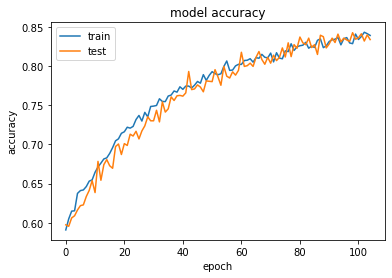

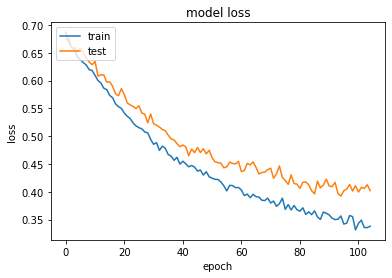

In [212]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("DNN_acc.png")
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("DNN_loss.png")
plt.show()

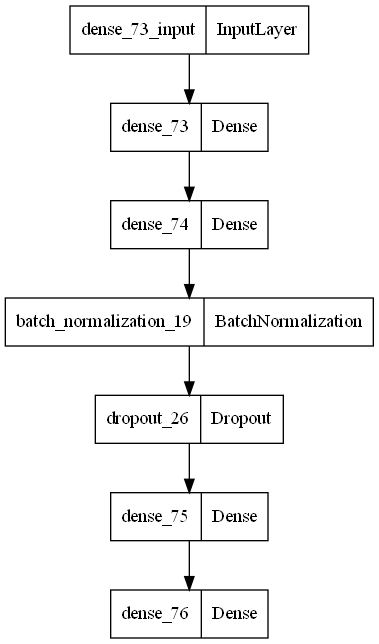

In [207]:
plot_model(model2)